# Итоговый проект
В рамках финальной работы я решила исследовать телеграм чаты для общения на английском языке. Я нашла чаты с помощью сайта [tgstat.ru](https://tgstat.ru/ratings/chats/language/public?sort=msgs), взяла первые (релевантные) по количеству сообщений:
1. [English_Telegram_Chatting](https://t.me/English_Telegram_Chatting)
2. [English_World_Chatting](https://t.me/english_world_chatting)
3. [Englishgalaxy_Speaking](https://t.me/englishgalaxy_speaking)

Выгружала историю за всё время, не включала файлы/медиа с целью экономии времени *(половина выгрузки одного чата со всеми галочками занимала более 2-х часов, видимо из-за плохого интернета)*

## Создание датафрейма

Устанавливаю необходимые для работы библиотеки

In [29]:
pip install emojis

In [30]:
import numpy as np
import pandas as pd
import json
import re
import emojis

Загружаю сообщения

In [31]:
f = open('result 1.json', 'r', encoding='utf-8')
data = json.load(f)
f.close()

In [32]:
data['name']

'English Chatting | American Group'

In [33]:
len(data['messages'])

292310

Это сообщения из чата "English Chatting | American Group". Всего их 292.310 штук.
Теперь создаю словарь. Здесь я исключаю сервисные сообщения и создаю будущие столбцы датафрейма:

*   **chat** - название чата (так как в финальном датафрейме будут сообщения из 3-х чатов)
*   **date** - дата
*   **user** - никнейм отправителя
*   **name** - имя отправителя
*   **text** - сам текст сообщения
*   **reactions** - есть ли реакции на сообщении
*   **edited** - отредактировано сообщение или нет







In [34]:
d = {'chat':[], 'date':[], 'user':[], 'name':[], 'text':[], 'reactions':[], 'edited':[]}

for message in data['messages']:
    if message['type'] == 'message':
        d['chat'].append('english_telegram_chatting')
        d['date'].append(message['date'])
        d['user'].append(message['from_id'])
        d['name'].append(message['from'])
        if 'text' in message:
            d['text'].append(message['text'])
        else:
            d['text'].append('')
        if 'reactions' in message:
            d['reactions'].append(True)
        else:
            d['reactions'].append(False)
        if 'edited' in message:
            d['edited'].append(True)
        else:
            d['edited'].append(False)
    else:
        print(message)

{'id': 1, 'type': 'service', 'date': '2021-06-28T09:33:29', 'date_unixtime': '1624862009', 'actor': 'English Chatting | American Group', 'actor_id': 'channel1508370962', 'action': 'migrate_from_group', 'title': 'American English', 'text': '', 'text_entities': []}
{'id': 42826, 'type': 'service', 'date': '2023-07-16T00:08:42', 'date_unixtime': '1689455322', 'actor': 'JoeEng', 'actor_id': 'user5539941354', 'action': 'score_in_game', 'game_message_id': 42825, 'score': 26, 'text': '', 'text_entities': []}
{'id': 83029, 'type': 'service', 'date': '2024-05-06T14:46:34', 'date_unixtime': '1714995994', 'actor': 'SangMata (beta)', 'actor_id': 'user5422359176', 'action': 'remove_members', 'members': ['SHIPPERING'], 'text': '', 'text_entities': []}
{'id': 85085, 'type': 'service', 'date': '2024-05-18T14:34:53', 'date_unixtime': '1716032093', 'actor': 'SangMata (beta)', 'actor_id': 'user5422359176', 'action': 'remove_members', 'members': [None], 'text': '', 'text_entities': []}
{'id': 237451, 'typ

Сервисных сообщений было всего 5. Теперь создаю первый датафрейм

In [35]:
df1 = pd.DataFrame(d)
df1

,chat,date,user,name,text,reactions,edited
0,english_telegram_chatting,2021-06-29T16:08:39,user1136302676,Mohamed,[Welcome to all of you in our wonderful commun...,True,True
1,english_telegram_chatting,2021-06-29T16:12:22,user1136302676,Mohamed,"[✅ to play games here type : \n\n_ , {'type': ...",True,True
2,english_telegram_chatting,2021-06-29T16:12:31,user940347423,..... Avi,Ok,False,False
3,english_telegram_chatting,2021-06-29T16:12:40,user940347423,..... Avi,Why u don't add people,False,False
4,english_telegram_chatting,2021-06-29T16:13:02,user1136302676,Mohamed,they will came,False,False
...,...,...,...,...,...,...,...
292300,english_telegram_chatting,2025-03-24T15:33:00,user7115849309,ربما ملاك مرسل💙 .,"Bye, you're the loser",False,False
292301,english_telegram_chatting,2025-03-24T15:33:52,user7115849309,ربما ملاك مرسل💙 .,Yes,False,False
292302,english_telegram_chatting,2025-03-24T15:33:58,user7369619444,Sophia,"[Welcome , {'type': 'mention_name', 'text': 'H...",False,False
292303,english_telegram_chatting,2025-03-24T15:34:23,user1718534020,Abd-elwahab,Hey,False,False


Строк оказалось очень много, поэтому сокращаю их до 5.000 самых новых

In [43]:
df1 = df1.tail(5000)

Добавляю еще некоторые столбцы, которые в дальнейшем использую для анализа:
*   **date** - делю столбец на 3, оставляю здесь только дату
*   **hour** - час (в 24-часовом формате)
*   **day_of_week** - день недели
*   **len_text** - количество символов в сообщении
*   **count_emoji** - количество эмоджи в сообщении






In [44]:
for idx in df1.index:
    if type(df1.loc[idx, 'text']) == list:
        new_string = ''
        for elem in df1.loc[idx, 'text']:
            if type(elem) == str:
                new_string += elem
        df1.loc[idx, 'text'] = new_string

df1 = df1[df1['text'] != '']

df1['date'] = pd.to_datetime(df1['date'])
df1['hour'] = df1['date'].dt.hour
df1['day_of_week'] = df1['date'].dt.day_name()
df1['len_text'] = df1.text.str.len()
df1['count_emoji'] = df1['text'].apply(lambda s: emojis.count(str(s)))

df1

,chat,date,user,name,text,reactions,edited,hour,day_of_week,len_text,count_emoji
287258,english_telegram_chatting,2025-03-23 07:14:40,user6389369288,Fronica Paul,😂😂,False,False,7,Sunday,2,2
287259,english_telegram_chatting,2025-03-23 07:14:45,user627658605,ياااارب كن معي يالله ...,Cuz they want to talk to u cuz u r girl,False,False,7,Sunday,39,0
287260,english_telegram_chatting,2025-03-23 07:15:13,user627658605,ياااارب كن معي يالله ...,Will u help me 🥺🥺,False,False,7,Sunday,17,2
287261,english_telegram_chatting,2025-03-23 07:15:15,user1365451326,Disappear,I love your Lough my man 😂😂😂😂❤️,False,False,7,Sunday,31,5
287262,english_telegram_chatting,2025-03-23 07:15:19,user6389369288,Fronica Paul,Weird,False,False,7,Sunday,5,0
...,...,...,...,...,...,...,...,...,...,...,...
292300,english_telegram_chatting,2025-03-24 15:33:00,user7115849309,ربما ملاك مرسل💙 .,"Bye, you're the loser",False,False,15,Monday,21,0
292301,english_telegram_chatting,2025-03-24 15:33:52,user7115849309,ربما ملاك مرسل💙 .,Yes,False,False,15,Monday,3,0
292302,english_telegram_chatting,2025-03-24 15:33:58,user7369619444,Sophia,Welcome ! We're excited to have you with us. G...,False,False,15,Monday,314,1
292303,english_telegram_chatting,2025-03-24 15:34:23,user1718534020,Abd-elwahab,Hey,False,False,15,Monday,3,0


Теперь делаю то же самое с другими чатами

###Создание второго и третьего датафрейма

In [81]:
f1 = open('result 2.json', 'r', encoding='utf-8')
data1 = json.load(f1)
f1.close()

In [95]:
data1['name']

'English Chatting Group'

In [94]:
len(data1['messages'])

750156

В чате English Chatting Group 750.156 сообщений, из них 4 сервисных.

In [82]:
b = {'chat':[], 'date':[], 'user':[], 'name':[], 'text':[], 'reactions':[], 'edited':[]}

for message in data1['messages']:
    if message['type'] == 'message':
        b['chat'].append('english_world_chatting')
        b['date'].append(message['date'])
        b['user'].append(message['from_id'])
        b['name'].append(message['from'])
        if 'text' in message:
            b['text'].append(message['text'])
        else:
            b['text'].append('')
        if 'reactions' in message:
            b['reactions'].append(True)
        else:
            b['reactions'].append(False)
        if 'edited' in message:
            b['edited'].append(True)
        else:
            b['edited'].append(False)
    else:
        print(message)

{'id': 4710505, 'type': 'service', 'date': '2025-01-21T23:06:57', 'date_unixtime': '1737490017', 'actor': None, 'actor_id': 'user7387104279', 'action': 'invite_to_group_call', 'members': ['¸¸ .•*¨)🌹𝖌𝖆𝖗𝖈𝖍𝖔𝖔𝖓🌺.•´¸.•*´¨)'], 'text': '', 'text_entities': []}
{'id': 5389017, 'type': 'service', 'date': '2025-03-03T15:33:56', 'date_unixtime': '1741005236', 'actor': 'Combot', 'actor_id': 'user210944655', 'action': 'remove_members', 'members': ['Protectron'], 'text': '', 'text_entities': []}
{'id': 5451904, 'type': 'service', 'date': '2025-03-12T09:34:09', 'date_unixtime': '1741761249', 'actor': 'SangMata (beta)', 'actor_id': 'user5422359176', 'action': 'remove_members', 'members': ['Voice message to text'], 'text': '', 'text_entities': []}
{'id': 5523443, 'type': 'service', 'date': '2025-03-21T07:15:08', 'date_unixtime': '1742530508', 'actor': 'T.I.L.E.', 'actor_id': 'user7628794014', 'action': 'remove_members', 'members': ['T.I.L.E.'], 'text': '', 'text_entities': []}


In [83]:
df2 = pd.DataFrame(b)
df2

,chat,date,user,name,text,reactions,edited
0,english_world_chatting,2025-01-12T23:04:17,user6370365227,Cyber buddy,,True,True
1,english_world_chatting,2025-01-12T23:04:17,user7478051871,عبدالمهيمن عصام,Hi,True,True
2,english_world_chatting,2025-01-12T23:04:24,user7513959437,None,Same feeling dude,True,True
3,english_world_chatting,2025-01-12T23:04:24,user7694332769,None,What about Virat the GOAT,False,False
4,english_world_chatting,2025-01-12T23:04:26,user7900665553,None,This shit always simp,False,True
...,...,...,...,...,...,...,...
750147,english_world_chatting,2025-03-24T21:03:05,user957706877,A. K,Hy,False,False
750148,english_world_chatting,2025-03-24T21:03:23,user8088388037,Mellow.,Oke i dont,False,False
750149,english_world_chatting,2025-03-24T21:03:29,user7164529414,Laxmi geniune service 🤞🤞,Hy,False,False
750150,english_world_chatting,2025-03-24T21:03:33,user6479223306,Sadie Morgan,I don’t do almost. Either you’re all in or you...,False,False


In [84]:
df2 = df2.tail(7000)

In [85]:
for idx in df2.index:
    if type(df2.loc[idx, 'text']) == list:
        new_string1 = ''
        for elem in df2.loc[idx, 'text']:
            if type(elem) == str:
                new_string1 += elem
        df2.loc[idx, 'text'] = new_string1

df2 = df2[df2['text'] != '']

df2['date'] = pd.to_datetime(df2['date'])
df2['hour'] = df2['date'].dt.hour
df2['day_of_week'] = df2['date'].dt.day_name()
df2['len_text'] = df2.text.str.len()
df2['count_emoji'] = df2['text'].apply(lambda s: emojis.count(str(s)))

df2

<ipython-input-85-2ae61dcc8868>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = pd.to_datetime(df2['date'])
<ipython-input-85-2ae61dcc8868>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['hour'] = df2['date'].dt.hour
<ipython-input-85-2ae61dcc8868>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,chat,date,user,name,text,reactions,edited,hour,day_of_week,len_text,count_emoji
743152,english_world_chatting,2025-03-23 17:16:48,user7553332708,bunny fofo🐰💜,Ohh ok,False,False,17,Sunday,6,0
743153,english_world_chatting,2025-03-23 17:17:03,user1136302676,Mohamed,msrya,False,False,17,Sunday,5,0
743154,english_world_chatting,2025-03-23 17:17:18,user7553332708,bunny fofo🐰💜,Aywa 😂,False,False,17,Sunday,6,1
743155,english_world_chatting,2025-03-23 17:17:20,user7799721410,Cute Girl,"Message me,,,,",False,False,17,Sunday,14,0
743156,english_world_chatting,2025-03-23 17:17:49,user8086672814,El3ide,hello hello,False,False,17,Sunday,11,0
...,...,...,...,...,...,...,...,...,...,...,...
750147,english_world_chatting,2025-03-24 21:03:05,user957706877,A. K,Hy,False,False,21,Monday,2,0
750148,english_world_chatting,2025-03-24 21:03:23,user8088388037,Mellow.,Oke i dont,False,False,21,Monday,10,0
750149,english_world_chatting,2025-03-24 21:03:29,user7164529414,Laxmi geniune service 🤞🤞,Hy,False,False,21,Monday,2,0
750150,english_world_chatting,2025-03-24 21:03:33,user6479223306,Sadie Morgan,I don’t do almost. Either you’re all in or you...,False,False,21,Monday,61,0


In [86]:
df2 = df2.tail(5000)

In [87]:
f2 = open('result 3.json', 'r', encoding='utf-8')
data2 = json.load(f2)
f2.close()

In [97]:
data2['name']

'English Galaxy Speaking Club | АНГЛИЙСКИЙ ПО ПЛЕЙЛИСТАМ'

In [98]:
len(data2['messages'])

441731

В чате "English Galaxy Speaking Club | АНГЛИЙСКИЙ ПО ПЛЕЙЛИСТАМ" 441.731 сообщение, из них 32.467 - сервисные

In [88]:
c = {'chat':[], 'date':[], 'user':[], 'name':[], 'text':[], 'reactions':[], 'edited':[]}

for message in data2['messages']:
    if message['type'] == 'message':
        c['chat'].append('englishgalaxy_speaking')
        c['date'].append(message['date'])
        c['user'].append(message['from_id'])
        c['name'].append(message['from'])
        if 'text' in message:
            c['text'].append(message['text'])
        else:
            c['text'].append('')
        if 'reactions' in message:
            c['reactions'].append(True)
        else:
            c['reactions'].append(False)
        if 'edited' in message:
            c['edited'].append(True)
        else:
            c['edited'].append(False)
    else:
        print(message)

Выходные данные были обрезаны до нескольких последних строк (5000).
{'id': 367991, 'type': 'service', 'date': '2024-03-10T17:28:46', 'date_unixtime': '1710080926', 'actor': 'Inga', 'actor_id': 'user1406645928', 'action': 'invite_members', 'members': ['Inga'], 'text': '', 'text_entities': []}
{'id': 368060, 'type': 'service', 'date': '2024-03-10T18:11:45', 'date_unixtime': '1710083505', 'actor': 'Константин Родимкин', 'actor_id': 'user1026618749', 'action': 'invite_members', 'members': ['Константин Родимкин'], 'text': '', 'text_entities': []}
{'id': 368061, 'type': 'service', 'date': '2024-03-10T18:35:32', 'date_unixtime': '1710084932', 'actor': 'أنا في عداد المفقودين وأنا لا أريد ربما لن آتي إلى هنا بعد الآن. لا يوجد شيء هنا', 'actor_id': 'user899170771', 'action': 'invite_members', 'members': ['أنا في عداد المفقودين وأنا لا أريد ربما لن آتي إلى هنا بعد الآن. لا يوجد شيء هنا'], 'text': '', 'text_entities': []}
{'id': 368063, 'type': 'service', 'date': '2024-03-10T18:39:54', 'date_unixt

In [89]:
df3 = pd.DataFrame(c)
df3

,chat,date,user,name,text,reactions,edited
0,englishgalaxy_speaking,2022-01-09T15:33:16,user1220731732,Александр,,False,False
1,englishgalaxy_speaking,2022-01-09T15:34:49,user2080608310,Nikita,Hi,False,False
2,englishgalaxy_speaking,2022-01-09T15:34:59,user752300499,Danil Mazanko,Hello,False,False
3,englishgalaxy_speaking,2022-01-09T15:35:05,user5027746607,Delete,.,False,True
4,englishgalaxy_speaking,2022-01-09T15:35:21,user2080608310,Nikita,Only English?,False,False
...,...,...,...,...,...,...,...
409259,englishgalaxy_speaking,2025-03-24T14:33:35,user6764420803,Night,Will we succeed? 🥹🥹🥹,False,False
409260,englishgalaxy_speaking,2025-03-24T14:48:35,user859280716,Виктория,I’d like to support you and say ‘yes’ but I ne...,True,True
409261,englishgalaxy_speaking,2025-03-24T15:18:51,user1007336685,kerek,"I share the case with K""night"" *sir Eugene))) ...",False,False
409262,englishgalaxy_speaking,2025-03-24T15:27:22,user1007336685,kerek,I tried learnother languages and did not succe...,False,False


In [90]:
df3 = df3.tail(6000)

In [91]:
for idx in df3.index:
    if type(df3.loc[idx, 'text']) == list:
        new_string2 = ''
        for elem in df3.loc[idx, 'text']:
            if type(elem) == str:
                new_string2 += elem
        df3.loc[idx, 'text'] = new_string2

df3 = df3[df3['text'] != '']

df3['date'] = pd.to_datetime(df3['date'])
df3['hour'] = df3['date'].dt.hour
df3['day_of_week'] = df3['date'].dt.day_name()
df3['len_text'] = df3.text.str.len()
df3['count_emoji'] = df3['text'].apply(lambda s: emojis.count(str(s)))

df3

<ipython-input-91-7e8ae1fe124d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date'])
<ipython-input-91-7e8ae1fe124d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['hour'] = df3['date'].dt.hour
<ipython-input-91-7e8ae1fe124d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,chat,date,user,name,text,reactions,edited,hour,day_of_week,len_text,count_emoji
403264,englishgalaxy_speaking,2025-03-09 16:08:53,user1457017481,ㅤ,"If you don't want to aswer, don't do it then",False,False,16,Sunday,44,0
403265,englishgalaxy_speaking,2025-03-09 16:09:21,user1457017481,ㅤ,Did you swim in the river in winter?,False,False,16,Sunday,36,0
403266,englishgalaxy_speaking,2025-03-09 16:10:15,user2069324452,Асема,So strange questions \nI hope it's a joke\nI t...,False,True,16,Sunday,86,0
403267,englishgalaxy_speaking,2025-03-09 16:12:41,user1457017481,ㅤ,Perhaps you have not found such a place yet.,False,False,16,Sunday,44,0
403268,englishgalaxy_speaking,2025-03-09 16:13:32,user1457017481,ㅤ,Do you have any knowledge of the English langu...,False,False,16,Sunday,50,0
...,...,...,...,...,...,...,...,...,...,...,...
409259,englishgalaxy_speaking,2025-03-24 14:33:35,user6764420803,Night,Will we succeed? 🥹🥹🥹,False,False,14,Monday,20,3
409260,englishgalaxy_speaking,2025-03-24 14:48:35,user859280716,Виктория,I’d like to support you and say ‘yes’ but I ne...,True,True,14,Monday,61,2
409261,englishgalaxy_speaking,2025-03-24 15:18:51,user1007336685,kerek,"I share the case with K""night"" *sir Eugene))) ...",False,False,15,Monday,103,0
409262,englishgalaxy_speaking,2025-03-24 15:27:22,user1007336685,kerek,I tried learnother languages and did not succe...,False,False,15,Monday,189,0


In [92]:
df3 = df3.tail(5000)

##Анализ

Итак, сейчас нам известно:
*   Самое большое количество сообщений - 750.156 - в чате "English Chatting Group"
*   Больше всего сервисных сообщений - 32.467 - в чате "English Galaxy Speaking Club | АНГЛИЙСКИЙ ПО ПЛЕЙЛИСТАМ"

Теперь склеиваю все 3 датасета в 1:



In [93]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,chat,date,user,name,text,reactions,edited,hour,day_of_week,len_text,count_emoji
0,english_telegram_chatting,2025-03-23 07:14:40,user6389369288,Fronica Paul,😂😂,False,False,7,Sunday,2,2
1,english_telegram_chatting,2025-03-23 07:14:45,user627658605,ياااارب كن معي يالله ...,Cuz they want to talk to u cuz u r girl,False,False,7,Sunday,39,0
2,english_telegram_chatting,2025-03-23 07:15:13,user627658605,ياااارب كن معي يالله ...,Will u help me 🥺🥺,False,False,7,Sunday,17,2
3,english_telegram_chatting,2025-03-23 07:15:15,user1365451326,Disappear,I love your Lough my man 😂😂😂😂❤️,False,False,7,Sunday,31,5
4,english_telegram_chatting,2025-03-23 07:15:19,user6389369288,Fronica Paul,Weird,False,False,7,Sunday,5,0
...,...,...,...,...,...,...,...,...,...,...,...
14995,englishgalaxy_speaking,2025-03-24 14:33:35,user6764420803,Night,Will we succeed? 🥹🥹🥹,False,False,14,Monday,20,3
14996,englishgalaxy_speaking,2025-03-24 14:48:35,user859280716,Виктория,I’d like to support you and say ‘yes’ but I ne...,True,True,14,Monday,61,2
14997,englishgalaxy_speaking,2025-03-24 15:18:51,user1007336685,kerek,"I share the case with K""night"" *sir Eugene))) ...",False,False,15,Monday,103,0
14998,englishgalaxy_speaking,2025-03-24 15:27:22,user1007336685,kerek,I tried learnother languages and did not succe...,False,False,15,Monday,189,0


Финальный датасет из 15.000 строк готов. Благодаря столбцу "chat" могу сравнить чаты по разным параметрам.

In [112]:
df.groupby('chat')[['reactions', 'edited']].mean()

,reactions,edited
chat,,
english_telegram_chatting,0.0644,0.0730
english_world_chatting,0.0758,0.0874
englishgalaxy_speaking,0.1150,0.1674


Больше всего реагируют на сообщения и редактируют сообщения в чате "English Galaxy Speaking Club | АНГЛИЙСКИЙ ПО ПЛЕЙЛИСТАМ". Меньше всего - в чате "English Chatting | American Group"

In [138]:
df.groupby('chat')['len_text'].max()

,len_text
chat,
english_telegram_chatting,323
english_world_chatting,230
englishgalaxy_speaking,796


Самое длинное сообщение тоже в чате "English Galaxy Speaking Club | АНГЛИЙСКИЙ ПО ПЛЕЙЛИСТАМ". Посмотрим, что там написано.

In [121]:
df[df['len_text']==796]

,chat,date,user,name,text,reactions,edited,hour,day_of_week,len_text,count_emoji
11577,englishgalaxy_speaking,2025-03-14 22:25:51,user1457017481,ㅤ,"The word ""up"" can have the following meanings:...",False,False,22,Friday,796,0


In [119]:
df['text'][11577]

'The word "up" can have the following meanings:\n\xa0that indicates movement or position toward a higher place or position. For example: “She looked up at the sky,” “He climbed up the ladder to fix the roof.”\xa0\xa0\n\xa0denoting an increase in quantity, intensity, or level. For example: “Sales have gone up by 20% this year,” “Her mood suddenly lifted up after the news.”\xa0\xa0\n\xa0meaning to increase or raise something. For example: "She decided to up her game in the competition", "The company is planning to up its advertising budget".\xa0\xa0\n\xa0meaning to finish or complete something, often used in relation to tasks. For example: "I need to up my report before the meeting", "They managed to up the project in record time".\xa0\xa0\nAlso, "up" can mean\xa0\xa0, feeling, or state. For example: "She has a very up personality."\xa0\xa0'

Похоже, это объяснение значения слова "up".

In [123]:
df.groupby('chat')[['hour', 'day_of_week']].apply(lambda x: x.mode())

,,hour,day_of_week
chat,,,
english_telegram_chatting,0,12,Sunday
english_world_chatting,0,20,Monday
englishgalaxy_speaking,0,19,Sunday


Чаще всего люди переписываются в воскресенье - в двух из трех чатов, и в понедельник - в чате с самым большим количеством сообщений. Интересно, что во втором и третьем чате люди чаще переписываются вечером - в 19 или 20 часов, а в первом - днем, в 12.

Создам новый датафрейм с сообщениями, в которых обязательно есть эмоджи

In [126]:
df_emoji = df[df['count_emoji'] >= 1]

In [127]:
df_emoji.groupby('chat')['count_emoji'].mean()

,count_emoji
chat,
english_telegram_chatting,1.987790
english_world_chatting,1.655556
englishgalaxy_speaking,1.334615


В среднем люди используют от 1 до 2 эмоджи в сообщении

In [128]:
df_emoji.groupby('chat')['count_emoji'].max()

,count_emoji
chat,
english_telegram_chatting,161
english_world_chatting,23
englishgalaxy_speaking,9


Но есть сообщение, в котором аж 161 эмоджи:

In [129]:
df[df['count_emoji'] == 161]

,chat,date,user,name,text,reactions,edited,hour,day_of_week,len_text,count_emoji
4517,english_telegram_chatting,2025-03-24 12:52:13,user8142829702,c.ai,👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻...,False,False,12,Monday,323,161


In [130]:
df['text'][4517]

'👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻👊🏻.'

Кажется, кто-то сильно разозлился 😆

##Визуализация

<Axes: xlabel='day_of_week'>

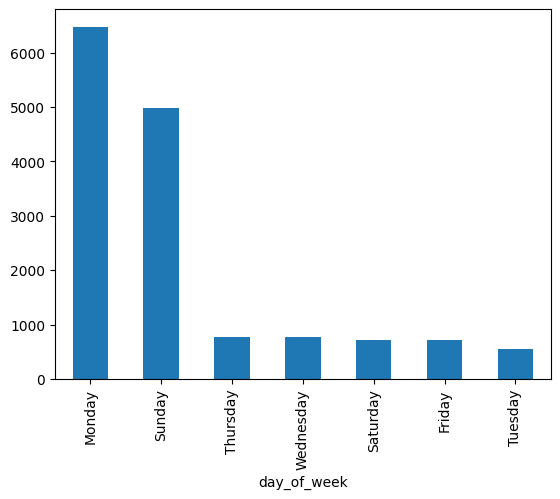

In [141]:
df.value_counts('day_of_week').plot(kind='bar')

На этом графике мы видим, что больше всего сообщений из взятых нами данных было отправлено в понедельник и воскресенье

<Axes: xlabel='hour'>

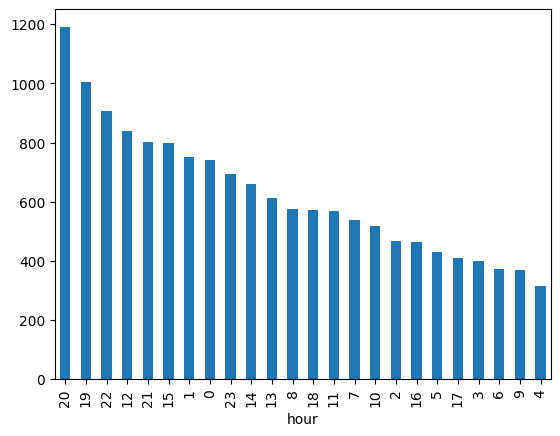

In [144]:
df.value_counts('hour').plot(kind='bar')

А здесь - количество сообщений по часам. Всё-таки вечер (19-22) - популярнее всего.

<Axes: xlabel='hour'>

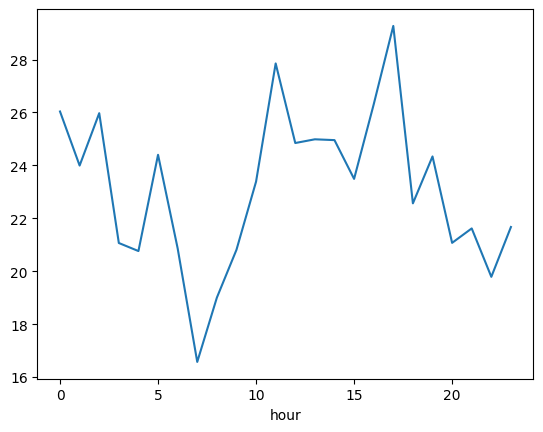

In [147]:
df.groupby('hour')['len_text'].mean().plot()

А на этом графике мы можем наблюдать, как меняется среднее количество символов в сообщении в зависимости от времени.

Благодаря этому исследованию я узнала, что самый активный период в подобных чатах - вечер с 21 до 22, а самый популярный день недели - воскресенье. Кроме того, поняла, какой из чатов самый популярный и какие у пользователей есть привычки (небольшая длина сообщений, не использование большого количества эмоджи). Надеюсь, что я смогу и в дальнейшем использовать эту информацию